## Learning objectives

load shapefiles into a GeoDataFrame with geopandas.read_file

inspect a GeoDataFrame (.head(), .shape) and plot base maps (.plot())

subset geographies (exclude AK/HI/PR) to build a continental US map (incl. DC)

add styling columns and color states conditionally with .assign() and .loc

create simple thematic maps (e.g., Midwest highlight, 2024 election red/blue)

document steps and reasoning in code comments and markdown

In [1]:
import pandas as pd
import geopandas as gpd

## Question 1

In [2]:
mydata = gpd.read_file('/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp')

In [4]:
#Part a This just pulls the head or first 5 lines of the data. Something learned in TDM 101
mydata.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [7]:
#Part b Shape of Data. This below shows there are 52 rows and 10 columns 
mydata.shape

(52, 10)

<Axes: >

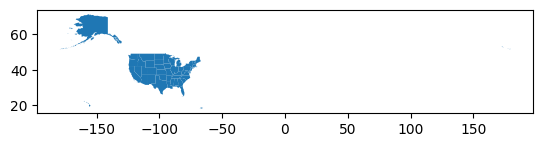

In [8]:
#Part c Just plots the data of the data which appears to be the whole of United States 
mydata.plot()

Markdown notes and sentences and analysis written here.

## Question 2

In [10]:
#This filters out the rows that correspond with those 3 names. Similar to a SQL statement we are pulling those names from ['state']. isin checks if each value is in the state column and the ~ acts as a way to say will not 
mycontinentialdata = mydata[~mydata['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [11]:
#There are now 3 less rows in the dataset
mycontinentialdata.shape

(49, 10)

<Axes: >

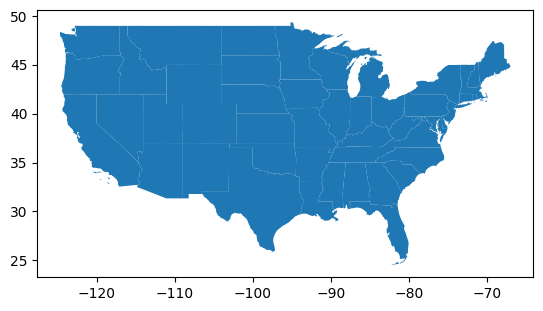

In [13]:
#Becayse we removed the islands it is just the USA that is shown now 
mycontinentialdata.plot()

Markdown notes and sentences and analysis written here.

## Question 3

In [14]:
#assassining the whole map to be orange by setting it = to the color
mycontinentialdata = mycontinentialdata.assign(mycolors='orange')

<Axes: >

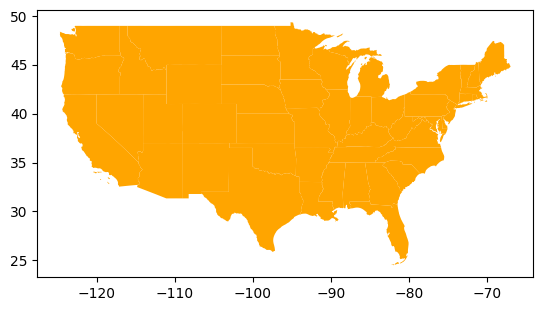

In [15]:
mycontinentialdata.plot(color = mycontinentialdata['mycolors'])

In [17]:
#What this does if name is indiana and only indiana than make the state = green if not than it will be mycolors which is assigned as orange
mycontinentialdata.loc[mycontinentialdata['NAME'] == 'Indiana', 'mycolors'] = 'green'

<Axes: >

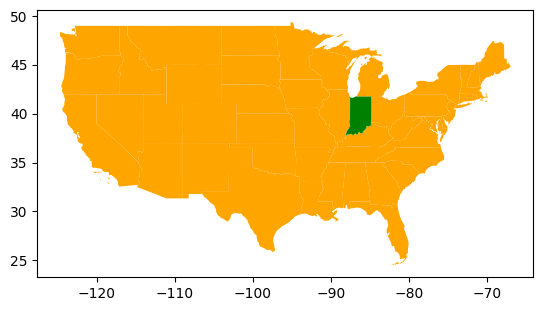

In [18]:
mycontinentialdata.plot(color = mycontinentialdata['mycolors'])

Markdown notes and sentences and analysis written here.

## Question 4

In [25]:
#What this does is create a list meaning everything within the 'name column that is Ohia, Indiana, Illinois, Wisconsin,and Michigan are going to be green and if not those names than keep orange 
mycontinentialdata.loc[mycontinentialdata['NAME'].isin(['Ohio', 'Indiana', 'Illinois', 'Wisconsin', 'Michigan']), 'mycolors'] = 'green'

<Axes: >

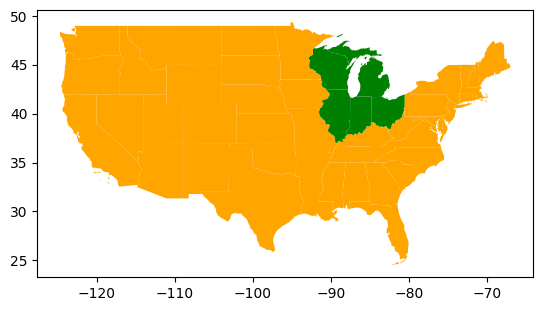

In [27]:
#this prints the final results 
mycontinentialdata.plot(color=mycontinentialdata['mycolors'])

Markdown notes and sentences and analysis written here.

## Question 5

In [29]:
#I assigned the whole map to be the color red if not assigned any other color
mycontinentialdata = mycontinentialdata.assign(mycolors='red')

In [30]:
#I am not sure if this is how they wanted it done but I made a list of every blue state which is below so it will make any state that mentioned blue while the rest of the states red so I wouldn't have to create a list for both red states and blue states 
mycontinentialdata.loc[mycontinentialdata['NAME'].isin(['Washington', 'Oregon', 'California', 'Colorado', 'New Mexico', 'Minnesota', 'Illinois', 'Virginia', 'Maryland', 'New Jersey', 'New York', 'Massachusetts', 'Rhode Island', 'Connecticut', 'DC', 'Maine', 'New Hampshire', 'Vermont', 'Delaware']), 'mycolors'] = 'blue'

<Axes: >

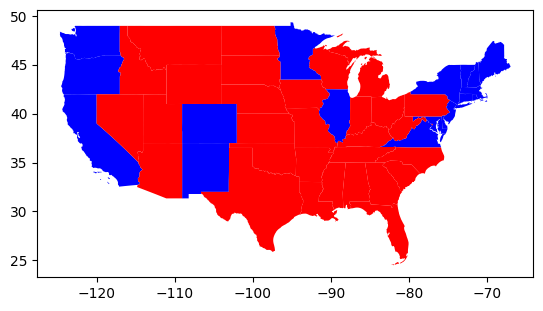

In [31]:
#Printed out the outcome
mycontinentialdata.plot(color=mycontinentialdata['mycolors'])

Markdown notes and sentences and analysis written here.